In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [4]:
studentAssessment = pd.read_csv('~/Data_for_first_project/studentAssessment.csv')
assessments = pd.read_csv('~/Data_for_first_project/assessments.csv')

Total_assessments = studentAssessment.merge(assessments, on = 'id_assessment')
#джойним данные по сдачам и данные по экзаменам.

Total_assessments.head(20)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0
5,1752,45462,20,0,70.0,AAA,2013J,TMA,19.0,10.0
6,1752,45642,18,0,72.0,AAA,2013J,TMA,19.0,10.0
7,1752,52130,19,0,72.0,AAA,2013J,TMA,19.0,10.0
8,1752,53025,9,0,71.0,AAA,2013J,TMA,19.0,10.0
9,1752,57506,18,0,68.0,AAA,2013J,TMA,19.0,10.0


In [5]:
Exams = Total_assessments.query('assessment_type == "Exam"')

Берём только известные нам экзамены, так как речь в задании идёт об экзаменах. 
Второй вариант (если за экзамен считать набор 100 баллов из нескольких тестов) нам будет сложно использовать без подтверждения, так как возникнет много вопросов к подсчёту среднего балла (за какой именно экзамен или за какую совокупноcть). <br> Поэтому мы сделаем анализ на основе имеющихся у нас неполных данных, которые точно связаны с экзаменами.

Cмотрим, сколько максимум предметов сдавали студенты - максимум по 2:

In [6]:
Exams.groupby(['id_student'], as_index = False).agg({'code_module' : 'count', 'code_presentation' : 'count'}) \
.query('code_module > 1').sort_values(by = 'code_module', ascending = False).head(10)

,id_student,code_module,code_presentation
72,80329,2,2
2667,605540,2,2
2872,616870,2,2
2869,616658,2,2
2861,615075,2,2
2856,614804,2,2
2851,614265,2,2
2843,613667,2,2
2839,613370,2,2
2812,611593,2,2


Cмотрим, сколько максимум семестров сдавали студенты - тоже максимум по 2:

In [7]:
Exams.groupby(['id_student'], as_index = False).agg({'code_module' : 'count', 'code_presentation' : 'count'}) \
.query('code_presentation > 1').sort_values(by = 'code_presentation', ascending = False).head(10)

,id_student,code_module,code_presentation
72,80329,2,2
2667,605540,2,2
2872,616870,2,2
2869,616658,2,2
2861,615075,2,2
2856,614804,2,2
2851,614265,2,2
2843,613667,2,2
2839,613370,2,2
2812,611593,2,2


Смотрим,какие это были экзамены:
322 студента сдавали и ССС, и DDD - это нормально, сдавали разные предметы в разных семестрах или в одном семестре, то есть точно это были разные курсы.
4 студента сдавалти DDD по 2 раза - нужно выяснить подробности.

In [8]:
Exams.groupby(['id_student'], as_index = False).agg({'code_module' : 'sum', 'code_presentation' : 'count'}) \
.query('code_module == "DDDDDD"')
#.query('code_module == "CCCDDD"') - 322
#.query('code_module == "CCCCCC"') - таких нет

,id_student,code_module,code_presentation
1377,527323,DDDDDD,2
1490,540758,DDDDDD,2
2415,593903,DDDDDD,2
2661,605118,DDDDDD,2


Студентов мало, можем быстро посмотреть все типы тестов и в каких семестрах они сдавались:

In [9]:
Total_assessments.query('id_student == [527323, 540758, 593903, 605118]') \
.groupby(['id_student', 'code_presentation'], as_index = False).agg({'assessment_type':'sum', 'weight' : 'sum'})

,id_student,code_presentation,assessment_type,weight
0,527323,2013B,TMATMATMATMATMATMAExam,175.0
1,527323,2014B,TMATMATMATMATMATMAExam,200.0
2,540758,2013B,TMATMATMATMATMATMAExamCMACMACMACMACMACMACMA,200.0
3,540758,2014B,TMATMATMATMATMATMAExam,200.0
4,593903,2013J,TMATMATMATMATMATMAExam,200.0
5,593903,2014J,TMATMATMATMATMATMAExam,200.0
6,605118,2013J,TMATMATMATMATMAExam,180.0
7,605118,2014J,TMATMATMATMATMAExam,190.0


- Каждый семестр у всех кроме одного заканчивался экзаменом после ряда тестов TMA, что нормально. 
- Предмет изучали в один и тот же определённый семестр года, возможно они пересдачники и не сдав один раз, пересдавали через год?

In [10]:
Total_assessments.query('id_student == [527323, 540758, 593903, 605118]') \
.query('assessment_type == "Exam"') \
.groupby(['id_student', 'code_presentation', 'code_module'], as_index = False).agg({'score':'sum'})

,id_student,code_presentation,code_module,score
0,527323,2013B,DDD,24.0
1,527323,2014B,DDD,18.0
2,540758,2013B,DDD,40.0
3,540758,2014B,DDD,60.0
4,593903,2013J,DDD,49.0
5,593903,2014J,DDD,44.0
6,605118,2013J,DDD,42.0
7,605118,2014J,DDD,64.0


Нет, это не пересдачники, трое из четырёх замечательно сдавали экзамены и завершали курс каждый год, у одного ни разу не вышло. Значит они скорее всего решили повторить обучение через год. А каждый 'подход' заканчивался экзаменом в конце семестра.

- Исходя из большинства наблюдений, будем считать в данном случае, что <b>курс - это один семестр изучения одного предмета</b>.
- Курс идёт в определённый семестр года и непременно заканчивается экзаменом - итогом курса.
- Hаботать предстоит с результатами по 6 экзаменам (6 семестров) в двух предметах. Только эта выборка нам доступна и обладает всеми данными по нашей задаче.

#### Для каждого студента, который дошёл до экзаменов, находим:
- recency - среднее время сдачи одного экзамена, 
- frequency - завершаемость курсов, 
- monetary - среднее количество баллов.

In [11]:
Total_assessments.query('assessment_type == "Exam"').fillna('empty') \
.date_submitted.value_counts()
#.score.value_counts()
#проверим, нет ли в датах и score пустых значений - нет.

244    777
230    721
243    676
242    650
234    522
237    466
236    240
241    230
245    222
229    179
231    152
248     50
233     25
250     16
238      7
249      6
251      6
252      5
259      2
256      2
255      1
266      1
285      1
235      1
279      1
Name: date_submitted, dtype: int64

Cоздаём датафрейм с двумя метриками

In [12]:

RFM_df = Total_assessments.query('assessment_type == "Exam"') \
.groupby('id_student', as_index = False).agg({'date_submitted':'mean', 'score' : 'mean'})
RFM_df.head()

,id_student,date_submitted,score
0,23698,243.0,80.0
1,24213,236.0,58.0
2,27116,243.0,96.0
3,28046,237.0,40.0
4,28787,243.0,44.0


Cоздаём колонку с третьей метрикой - frequency

In [13]:
# Сначала создаём датафрейм, в котором сделаем группировку по студентам и посчитаем все даты сдач каждого - это будут попытки.
# Далее заджойним кусок основного датафрейма с успешными сдачами экзаменов (outer join). Теперь у нас есть попытки и успешные 
#сдачи для каждого из студентов, можем посчитать завершаемость. 
frequency_DF = \
Total_assessments.query('assessment_type == "Exam"') \
.groupby(['id_student'], as_index = False).agg({'date_submitted' : 'count'}) \
.rename(columns = {'date_submitted' : 'tries'}) \
.merge(Total_assessments.query('assessment_type == "Exam"') \
.query('score >= 40.0') \
.groupby(['id_student'], as_index = False).agg({'date_submitted' : 'count'}) \
.rename(columns = {'date_submitted' : 'done'}), on = 'id_student', how = 'outer')

#в колонке done будут пустые значения напротив тех, кто не сдал ничего. Поэтому чтобы корректно посчитать завершаемость
#заполним их нулями
frequency_DF.done = frequency_DF.done.fillna(0)
#проверяем
frequency_DF.done.value_counts()

1.0    3802
0.0     536
2.0     295
Name: done, dtype: int64

Cоздаём колонку завершаемости - делим успешные сдачи на попытки:

In [14]:
frequency_DF['frequency'] = frequency_DF['done'] / frequency_DF['tries']

Cмотрим на возможные знаначения метрики. <br> 
Есть те, кто сдал всё, за что брался, есть немного людей, не осиливших второй курс (напомню, что максимум у нас студенты сдавали 2 курса). А также есть неуспешные студенты, не справившиеся с экзаменами.

In [15]:
frequency_DF.frequency.value_counts()

1.0    4069
0.0     536
0.5      28
Name: frequency, dtype: int64

In [16]:
frequency_DF = frequency_DF.drop(columns=['tries', 'done']) 
#удаляем лишние колонки

In [17]:
RFM_df = RFM_df.merge(frequency_DF, on = 'id_student')
#добавляем третью метрику в датафрейм RFM

In [18]:
RFM_df = RFM_df.rename(columns = {'score' : 'monetary', 'date_submitted' : 'recency'})
#переименовываем колонки в соответствии с метриками.

In [19]:
RFM_df.head()
#.shape
#получаем датафрейм с 4633 строками, столько у нас студентов.

,id_student,recency,monetary,frequency
0,23698,243.0,80.0,1.0
1,24213,236.0,58.0,1.0
2,27116,243.0,96.0,1.0
3,28046,237.0,40.0,1.0
4,28787,243.0,44.0,1.0


Рассчитаем квантили (как в предложенной методике RFM анализа) для деления каждой метрики на 5 сегментов. <br>

Видим, что завершаемость (frequency) у нас делить по квантилям на 5 частей будет бессмысленно, так как ранее мы выяснили, что там только 3 значения соответственно, рангов может быть только 3 - чем больше значение, тем выше ранг.

In [20]:
quintiles = RFM_df[['recency','monetary', 'frequency', ]].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 231.0, 0.4: 237.0, 0.6: 242.0, 0.8: 243.5},
 'monetary': {0.2: 46.200000000000045, 0.4: 60.0, 0.6: 72.0, 0.8: 84.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0}}

#### Посмотрим на распределение средних сроков (recency), визуализируем данные.

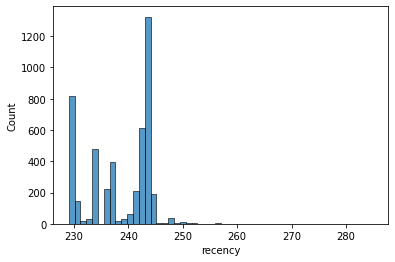

In [21]:
sns.histplot(RFM_df.recency)

Видим, что оно очень неравномерно и данные сильно варьируются, видны тренды.
В этой метрике за основу берём разделение по процентилям. Чем меньше срок, тем лучше - больше ранг дадим самым меньшим срокам.

#### Посмотрим на распределение среднего балла за сдачу (monetary), визуализируем данные.

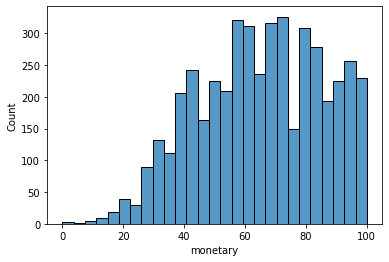

In [22]:
sns.histplot(RFM_df.monetary)

Распределение более равномерное, а баллы у студентов довольно разнообразные.
<br> <br>
В этой метрике точно нужно отделить сегмент до 40 баллов - не сдавших. Также распределение показывает, что группу не 
сдавших можно поделить на совсем сложных ребят и имеющих некоторый потенциал (достаточно много тех, кто остался в районе 30-39 баллов). Успешные ученики легко делятся на 3 ранга по курглым баллам (40-59, 60-79 (самый крупный сегмент), 80-100). Чем больше баллов, тем выше ранг.

In [23]:
#Присваиваем ранги recency по кавантилям.

def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1

In [24]:
#создаём колонку для ранга recency
RFM_df['R'] = RFM_df['recency'].apply(lambda x: r_score(x))

In [25]:
#Присваиваем ранги frequency по трём возможным значениям переменной (беррём за основу 5-бальную шкалу но без промежуточных
#значений).

def f_score(x):
    if x == 1.0:
        return 5
    elif x == 0.5:
        return 3
    else:
        return 1

In [26]:
#создаём колонку для ранга frequency
RFM_df['F'] = RFM_df['frequency'].apply(lambda x: f_score(x))

In [27]:
#Присваиваем ранги monetary по 5-бальной шкале с поправкой на то, что неуд это два возможных варианта - совсем лодыри и
#имеющие надежду (выяснили наличие таких по визуализации распределения)

def m_score(x):
    if x >= 0 and x < 30:
        return 1
    elif x >= 30 and x < 40:
        return 2
    elif  x >= 40 and x < 60:
        return 3
    elif x >= 60 and x < 80:
        return 4
    else:
        return 5

In [28]:
#создаём колонку для ранга monetary
RFM_df['M'] = RFM_df['monetary'].apply(lambda x: m_score(x))
RFM_df.head()

,id_student,recency,monetary,frequency,R,F,M
0,23698,243.0,80.0,1.0,2,5,5
1,24213,236.0,58.0,1.0,4,5,3
2,27116,243.0,96.0,1.0,2,5,5
3,28046,237.0,40.0,1.0,4,5,3
4,28787,243.0,44.0,1.0,2,5,3


In [29]:
#Объединяем значения RFM в одну колонку для отнесения студента к тому или иному сегменту.

RFM_df['RFM_Score'] = RFM_df['R'].map(str) + RFM_df['F'].map(str) + RFM_df['M'].map(str)
RFM_df.head()

,id_student,recency,monetary,frequency,R,F,M,RFM_Score
0,23698,243.0,80.0,1.0,2,5,5,255
1,24213,236.0,58.0,1.0,4,5,3,453
2,27116,243.0,96.0,1.0,2,5,5,255
3,28046,237.0,40.0,1.0,4,5,3,453
4,28787,243.0,44.0,1.0,2,5,3,253


#### Посмотрим на характер получившихся групп студентов, чтобы их правильно описать.

In [30]:
RFM_df.groupby('RFM_Score', as_index = False).agg({'id_student' : 'count'}).sort_values(by = 'id_student', ascending = False)
#.shape

,RFM_Score,id_student
24,454,418
4,155,335
17,354,328
25,455,319
30,554,299
29,553,297
23,453,286
18,355,243
16,353,240
3,154,238


Одельно посмотрим на сегменты с завершенным 1-м из 2-х курсов (frequency - 0.5) на 2 балла в среднем, чтобы понять, какие это студенты

In [31]:
RFM_df.query('RFM_Score == ["332", "432", "232"]').id_student.to_list()

[145114, 535161, 566185, 572382, 601082, 630200, 637691]

In [32]:
#находим их в общем датафрейме по одному
Total_assessments.query('id_student == "145114"')

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
58714,24295,145114,21,0,78.0,CCC,2014J,CMA,18.0,2.0
61168,24296,145114,69,0,66.0,CCC,2014J,CMA,67.0,7.0
61601,24297,145114,147,0,50.0,CCC,2014J,CMA,144.0,8.0
63232,24298,145114,219,0,38.0,CCC,2014J,CMA,214.0,8.0
64845,24299,145114,244,0,22.0,CCC,2014J,Exam,NaN,100.0
83471,25355,145114,24,0,77.0,DDD,2014B,TMA,25.0,10.0
84498,25356,145114,52,0,79.0,DDD,2014B,TMA,53.0,12.5
85660,25357,145114,71,0,89.0,DDD,2014B,TMA,74.0,17.5
85879,25358,145114,115,0,39.0,DDD,2014B,TMA,116.0,20.0
87339,25360,145114,199,0,24.0,DDD,2014B,TMA,200.0,20.0


Стало понятно - плохо сдавали оба экзамена, но по одному всё-таки дотянули, поэтому средний балл такой.

### Формулируем описание всех групп (у нас их не очень много), подумаем, что можно укрунить, создаём границы метрик.

#### флагманы
[4-5]55 - отличники, для которых всё просто
554 - хорошисты, сдают быстро, не дотягивают до высших баллов

#### cпособные (могут пополнить костяк или флагамнов)
[1-2]55 - отличники-лентяи или очень уж вдумчивые (подумают быстрее - всё равно сдадут)
[1-2]54 - очень долго думают, но способности хороши (подумают быстрее - всё равно сдадут)

#### костяк
[3-4]54 - твёрдые успешные ребята, всё понимают, сдают хорошо

#### кандидаты во флагманы (требуется приложение усилий)
355 - усваивают отлично, но им нужно время

#### студенты с потенциалом (требуется приложение усилий)
[3-5]33 - брались за 2 курса, один осилили (можно подтянуть их, у них есть желание учиться и потенциал)

#### несерьёзные (в зоне риска)
[4-5]53- торопятся быстрее сдать, своё получают
353 - звёзд с неба не хтватают, думают небыстро, способностей к сдаче немного
233 - не осили 2 курса, может потому, что долго соображают
 
#### разгильдяи (в зоне риска, можем потерять)
[1-2]53 - на грани несдачи, этих можем потерять 
[2-4]32 - брались за 2 курса, один сдали, но еле как, а второй плохо

#### недотянувшие до сдачи (требуется приложение усилий)
[4-5]12  - вероятно, старательные, но немного им не хватает до сдачи экзамена (можно качнуть до сдающих)

#### безнадёжные
[1-2]1[1-2] - лодыри, либо совсем без пониания, долго тянут и не сдают.
312 - может быть невезение, может быть непонимание, но результат плохой, уверенности нет
[3-5]11 - тоже лодыри, либо самоуверенные баз понимания - сдают быстро или умеренно, но совсем уж низкий балл.

In [33]:
#создаём такие сегменты и колонку в нашем датафрейме

segt_map = {
    r'[4-5]55': 'флагманы',
    r'554': 'флагманы',
    r'[1-2]55': 'способные (могут пополнить костяк или флагамнов)',
    r'[1-2]54': 'способные (могут пополнить костяк или флагамнов)',
    r'[3-4]54': 'Костяк',
    r'355': 'кандидаты во флагманы (требуется приложение усилий)',
    r'[3-5]33': 'студенты с потенциалом (требуется приложение усилий)',
    r'[4-5]53': 'несерьёзные (в зоне риска)',
    r'353': 'несерьёзные (в зоне риска)',
    r'233': 'несерьёзные (в зоне риска)',
    r'[1-2]53': 'разгильдяи (можем потерять)',
    r'[2-4]32': 'разгильдяи (можем потерять)',
    r'[4-5]12': 'недотянувшие до сдачи (требуется приложение усилий)',
    r'[1-2]1[1-2]': 'безнадёжные',
    r'312': 'безнадёжные',
    r'[3-5]11': 'безнадёжные'
}

RFM_df['Segment'] = RFM_df['R'].map(str) + RFM_df['F'].map(str) + RFM_df['M'].map(str)
RFM_df['Segment'] = RFM_df['Segment'].replace(segt_map, regex=True)

RFM_df.head(20)

,id_student,recency,monetary,frequency,R,F,M,RFM_Score,Segment
0,23698,243.0,80.0,1.0,2,5,5,255,способные (могут пополнить костяк или флагамнов)
1,24213,236.0,58.0,1.0,4,5,3,453,несерьёзные (в зоне риска)
2,27116,243.0,96.0,1.0,2,5,5,255,способные (могут пополнить костяк или флагамнов)
3,28046,237.0,40.0,1.0,4,5,3,453,несерьёзные (в зоне риска)
4,28787,243.0,44.0,1.0,2,5,3,253,разгильдяи (можем потерять)
5,29411,237.0,62.0,1.0,4,5,4,454,Костяк
6,29420,244.0,62.0,1.0,1,5,4,154,способные (могут пополнить костяк или флагамнов)
7,29639,248.0,74.0,1.0,1,5,4,154,способные (могут пополнить костяк или флагамнов)
8,29764,230.0,94.0,1.0,5,5,5,555,флагманы
9,29820,230.0,76.0,1.0,5,5,4,554,флагманы


Делаем аггрегацию по сегментам и смотрим средние значения метрик для понимания приложения усилий. А также считаем количество студентов в кажом сегменте.

In [34]:
RFM_segt_agg = RFM_df.groupby('Segment', as_index = False) \
.agg({'recency':'mean', 'monetary':'mean', 'frequency':'mean', 'id_student':'count'})
RFM_segt_agg

,Segment,recency,monetary,frequency,id_student
0,Костяк,238.130697,69.329088,1.000000,746
1,безнадёжные,240.886667,28.693333,0.000000,375
2,кандидаты во флагманы (требуется приложение ус...,241.314815,88.191358,1.000000,243
3,недотянувшие до сдачи (требуется приложение ус...,232.354037,34.900621,0.000000,161
4,несерьёзные (в зоне риска),235.278450,49.661622,0.998184,826
5,разгильдяи (можем потерять),243.900468,49.681499,0.991803,427
6,способные (могут пополнить костяк или флагамнов),244.015091,80.272133,1.000000,994
7,студенты с потенциалом (требуется приложение у...,235.916667,48.666667,0.500000,18
8,флагманы,231.893238,82.160735,1.000000,843


In [35]:
RFM_segt_agg.id_student.sum()
#проверяем и видим, что никого из студентов не потеряли, все распраделены.

4633

#### Построим визуализации распределения наших метрик среди студентов по рангам. 

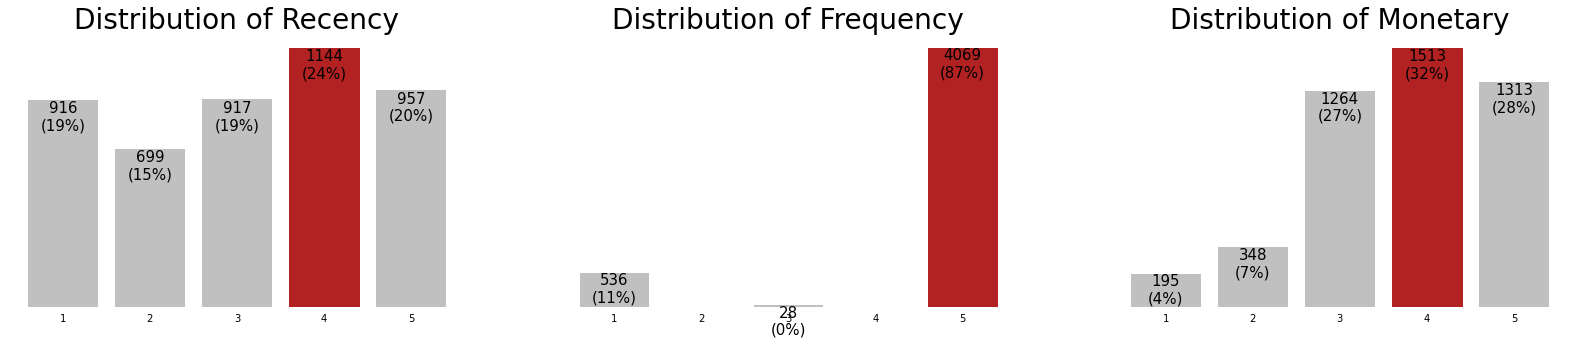

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 5))

for i, p in enumerate(['R', 'F', 'M']):
    parameters = {'R':'Recency', 'F':'Frequency', 'M':'Monetary'}
    y = RFM_df[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=28)
    
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='black', fontsize=15)

plt.show()

#### Видим в целом положительную картину:

- Сроки сдачи у большинства нормальные, самая большая группа - близкие к кратчайшим. При этом периоды сдачи близки между собой по количеству студентов.

- Подавляющее большинство взявшихся за экзамены сдали их (один или оба). С неудом остались лишь 11 процентов.

- Преобладают оценки хорошо и отлично. На 3 балла (если перевести в 5-бальную шкалу) сдали 27 процентов, внушительная но не  самая большая группа. Несдавших немного, но среди них есть студенты "2-го сегмента" - которые скорее всего могли бы сдать  на зачёт при определённых условиях.


#### Построим распределение метрики M - среднего количества баллов для разных рангов F(завершаемости) и R(сроков сдачи).

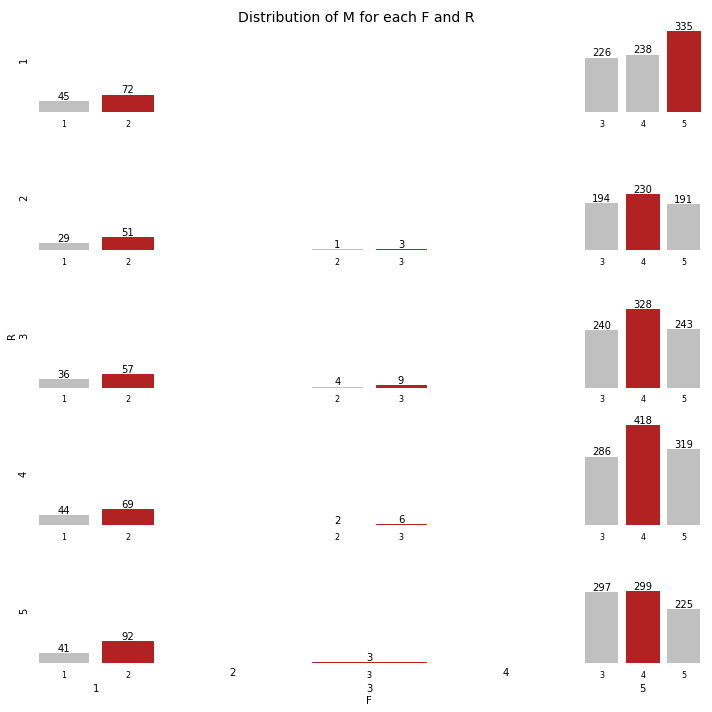

In [37]:
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = RFM_df[(RFM_df['R'] == r) & (RFM_df['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

#### Можем сказать, что:

- Из тех, кто не сдал, совсем уж лодырей не так много в каждом периоде времени сдачи, при этом, в любом периоде большинство несдавших принадлежат 2-й группе - тем, которые немного недотянули.
<br>

- Сроки, в которые студенты не сдают, есть разные, в каждом периоде их почти одинаковое количество, но всё же бОльшая группа полчивших неуд - это "торопыги", на втором месте "долго соображающие", сдавшие в последний момент.
<br>

- Студентов, сдавших только 1 из 2 экзаменов слишком мало, почти все они сдавали в средние сроки. Средние баллы у них так себе - результаты одного из экзаменов тянут их на дно по среднему баллу, кого-то даже в условный неуд.
<br>

- Большинство студентов находятся в условной категории "сдали". 
<br>

- Ни в одном периоде нет превалирующих "троечников", почти всегда это "хорошисты". Наибольшее количество "отличников" отмечается среди тех, кто сдавал в последнюю очередь.
<br>

- Самые большие группы успешно сдающих находятся в 3-4 периоде - то есть в средних сроках. В 4 периоде (довольно коротие сроки) находится самая большая группа "хорошистов" по сравнению с другими периодами, эта группа самая большая и среди групп по оценками в своём периоде - этих 'хорошистов' 418.
<br>

- В целом больших отклонений по периодам нет: нет такого, что в какие-то сроки намного больше или намного меньше успешно сдавали.
<br>

- Также у успешно сдавших не наблюдается большой разницы между группами по баллам от периода к периоду: везде есть приличное количество "троечников", "хорошистов" и "отличников".

#### Построим treemap, чтобы определить значительность сегментов
Интерактивный график, названия сегментов увеличиваются по наведению или нажатию

In [39]:
fig = px.treemap(RFM_segt_agg, path=["Segment"], values='id_student')
fig.update_layout(margin = dict(t=1, l=1, r=25, b=1))
fig.show()

- Мы видим, что почти половина наблюдений (3 крупных сегмента) - это неплохо сдавшие. 

- Неудов, как описано выше, мало. Кроме того больше четверти из них можно "спасти" (опишу ниже).

- Флагманов значительное количество, это тоже положительно.

- Однако, самый крупный сегмент - "способные", но на них мы опереться не можем, поэтому с ними надо работать.

- Кроме того, у нас сравнительно небольшой "Костяк", те, в ком можно быть уеренным. Это нехорошо. Но можно его раздуть за счёт "способных", поработав над их скоростью и качеством сдач. Костяк должен быть большим.

- Также мы имеем два небольших сегмента с которыми тоже надо поработать, их можно притянуть к хорошим и отличным группам студентов, сделав их аж "флагманами" (будет +243 флагмана!) или частью "костяка".

- Одна из крупнейших групп - "несерьёзные", работать с ними сложно, они долго и плохо усваивают, но как-то сдают. Надо обратить внимание на их проблемы. При хорошем исходе, тоже можно привести их в "костяк".

- У нас весомые группы "безнадёжных" студентов и "разгильдяев". Если на первых тратить силы я бы не рекомендовал, то вторые могут просто скатиться в неуды. За их внимание и прилежность надо побороться, усилить контроль за их обучением.

- Особая группа, которую не стоит сбрасывать со счетов - "недотянувшие до сдачи", их, кстати, не так уж мало - целых 161.Мы могли бы их сохранить на обучении, так как там небольшой недобор баллов до зачёта (всего 1-9 баллов по 100-бальной шкале). Может торопятся, может не хватает разъяснений. Так что можно привести их хотя бы в условную укрупнённую группу "сдавшие"


## РЕЗЮМЕ (свод формулировок)

### 1. По визуализации распределения наших метрик RFM среди студентов по рангам мы видим в целом положительную картину:

- Сроки сдачи у большинства нормальные, самая большая группа - близкие к кратчайшим. При этом периоды сдачи близки между собой по количеству студентов.

- Подавляющее большинство взявшихся за экзамены сдали их (один или оба). С неудом остались лишь 11%.

- Преобладают оценки хорошо и отлично. На 3 балла (если перевести в 5-бальную шкалу) сдали 27 процентов - внушительная но не самая большая группа. Несдавших экзамены совсем не много, кроме того среди них есть студенты "2-го сегмента" - которые скорее всего смогли бы сдать на зачёт при определённых условиях.

### 2. По распределению метрики M (среднего количества баллов для разных рангов), F (завершаемости) и R (сроков сдачи) можем сказать, что:

- Из тех, кто не сдал, совсем уж лодырей не так много в каждом периоде времени сдачи, при этом, в любом периоде большинство несдавших принадлежат 2-й группе - тем, которые немного недотянули.

- Сроки, в которые студенты не сдают, есть разные, в каждом периоде их почти одинаковое количество, но всё же бОльшая группа полчивших неуд - это "торопыги", на втором месте "долго соображающие", сдавшие в последний момент.

- Студентов, сдавших только 1 из 2 экзаменов слишком мало, почти все они сдавали в средние сроки. Средние баллы у них так себе - результаты одного из экзаменов тянут их на дно по среднему баллу, кого-то даже в условный неуд.

- Большинство студентов находятся в условной категории "сдали". 
- Ни в одном периоде нет превалирующих "троечников", почти всегда это "хорошисты". 
- Наибольшее количество "отличников" отмечается среди тех, кто сдавал в последнюю очередь.

- Самые большие группы успешно сдающих находятся в 3-4 периоде - то есть в средних сроках. 
- В 4 периоде (довольно коротие сроки) находится самая большая группа "хорошистов" по сравнению с другими периодами, эта группа самая большая и среди групп по оценками в своём периоде. Этих "хорошистов" 418.

- В целом больших отклонений по периодам нет: нет такого, что в какие-то сроки намного больше или намного меньше успешно сдавали.
- Также у успешно сдавших не наблюдается большой разницы между группами по баллам от периода к периоду: везде есть приличное количество "троечников", "хорошистов" и "отличников".

### 3. Анализ величины каждого сегмента, вкупе с описанием и структурой каждого из них (подробно описано выше), показывает:

- Что почти половина наблюдений (3 крупных сегмента) - это неплохо сдавшие. Проваливших экзамен действительно мало. Кроме того больше четверти из них можно "спасти" (опишу это ниже).

- Флагманов значительное количество, это тоже положительно.

- Однако, самый крупный сегмент - это "способные", на них мы опереться не можем, поэтому с ними лучше поработать.

- Кроме того, у нас сравнительно небольшой "Костяк" - тех, в ком можно быть уеренным. Это нехорошо. Но можно его раздуть  за счёт "способных", поработав над их скоростью и качеством сдач. Костяк должен быть большим.

- Также мы имеем два небольших сегмента с которыми тоже надо поработать и это приведёт к успеху. Их можно притянуть к хорошим и отличным группам студентов, сделав их аж "флагманами" (будет +243 флагмана!) или частью "костяка".

- Одна из крупнейших групп - "несерьёзные", работать с ними сложно, они долго и плохо усваивают, но как-то сдают. Надо обратить внимание на их проблемы. При хорошем исходе, тоже можно привести их в "костяк".

- У нас весомые группы "безнадёжных" студентов и "разгильдяев". Если на первых тратить силы я бы не рекомендовал, то вторые могут просто скатиться до оценок "неуд". За их внимание и прилежность надо побороться, усилить контроль за их обучением.

- Особая группа, которую не стоит сбрасывать со счетов - "недотянувшие до сдачи", их, кстати, не так уж мало - целых 161. Мы могли бы их сохранить на обучении, так как там небольшой недобор баллов до зачёта (всего 1-9 баллов по 100-бальной шкале). Может торопятся, может не хватает разъяснений. Так что можно привести их хотя бы в условную укрупнённую группу "сдавшие".

## Выводы
Анализ имеющихся данных показывает, что даже без приложения усилий ситуация со сдачей курсов неплохая.
Если в целом картина размеров сегментов нас устраивает, то никого не надо никуда "переводить". Всё зависит от норм в индустрии.
<br><br>
Также я бы рекомендовал проверить, а не слишком ли просты рассматриваемые нами курсы. 
<br><br>
Если же ситуацию по сдаче, всё же надо менять, то обращение к этому анализу поможет стабилизировать и улучшить картину.
<br><br>
(!)Мы рассмотрели только имеющиеся у нас полные данные по экзаменам, а это данные по 6 курсам, причём предметы 
только CCC и DDD. Полную картину получим, как только у нас будут все данные по всем предметам и экзаменам. Надо этим 
заняться, так как по неполным данным мы не сможем ответить на поставленные тобой важные вопросы.
<br><br>
Тем не менее, сейчас мы говорим про студентов, которые дошли до этапа под названием "экзамен".Чем больше эти люди будут проходить курсов, тем больше мы узнаем про их поведение, пользуясь этой методикой.